In [1]:
%display latex

# Define stuff

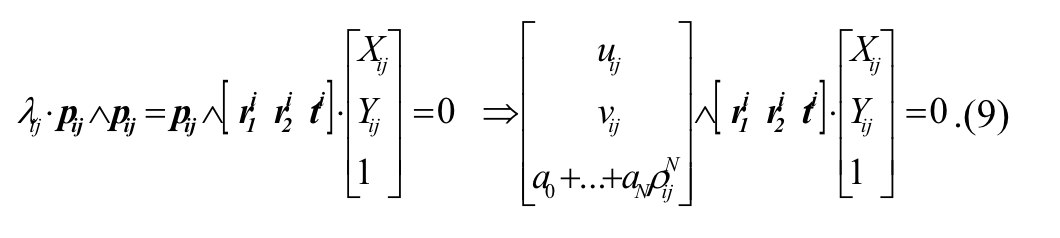

In [2]:
l = var("l", latex_name="\\lambda")

p = matrix(
    SR,
    [
        [var(f"r_{j}{i}" if i < 3 else f"t_{j}") for i in range(1, 4)]
        for j in range(1, 4)
    ],
)
p

[r_11 r_12  t_1]
[r_21 r_22  t_2]
[r_31 r_32  t_3]

In [3]:
u = vector([var("u"), var("v"), var("psif", latex_name=r"\psi(\rho)")])
u

(u, v, psif)

In [4]:
X = vector([var("X"), var("Y"), 1])
X

(X, Y, 1)

# General equations

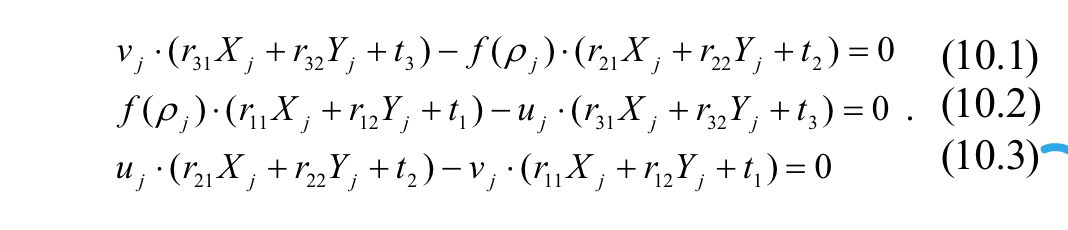

In [5]:
eqs = u.cross_product(p * X)
for el in eqs:
    display(el == 0)

-(X*r_21 + Y*r_22 + t_2)*psif + (X*r_31 + Y*r_32 + t_3)*v == 0

(X*r_11 + Y*r_12 + t_1)*psif - (X*r_31 + Y*r_32 + t_3)*u == 0

(X*r_21 + Y*r_22 + t_2)*u - (X*r_11 + Y*r_12 + t_1)*v == 0

In [7]:
l1, l2 = var("lambda1, lambda2")
eqs_ = eqs.subs(var("psif") == 1 + l1 * norm(u[:2]) ** 2 + l2 * norm(u[:2]) ** 4)
for e in eqs_:
    display(e)

-((abs(u)^2 + abs(v)^2)^2*lambda2 + (abs(u)^2 + abs(v)^2)*lambda1 + 1)*(X*r_21 + Y*r_22 + t_2) + (X*r_31 + Y*r_32 + t_3)*v

((abs(u)^2 + abs(v)^2)^2*lambda2 + (abs(u)^2 + abs(v)^2)*lambda1 + 1)*(X*r_11 + Y*r_12 + t_1) - (X*r_31 + Y*r_32 + t_3)*u

(X*r_21 + Y*r_22 + t_2)*u - (X*r_11 + Y*r_12 + t_1)*v

In [15]:
p.list() + u.list() + X.list() + [l1, l1]

[r_11,
 r_12,
 t_1,
 r_21,
 r_22,
 t_2,
 r_31,
 r_32,
 t_3,
 u,
 v,
 psif,
 X,
 Y,
 1,
 lambda1,
 lambda1]

In [17]:
for v in p.list() + u[:2].list() + X[:2].list() + [l1, l1]:
    assume(v, "real")

In [18]:
for e in eqs_:
    display(e)

-((u^2 + v^2)^2*lambda2 + (u^2 + v^2)*lambda1 + 1)*(X*r_21 + Y*r_22 + t_2) + (X*r_31 + Y*r_32 + t_3)*v

((u^2 + v^2)^2*lambda2 + (u^2 + v^2)*lambda1 + 1)*(X*r_11 + Y*r_12 + t_1) - (X*r_31 + Y*r_32 + t_3)*u

(X*r_21 + Y*r_22 + t_2)*u - (X*r_11 + Y*r_12 + t_1)*v

In [23]:
du, dv = var("d_u", "d_v")

assume(du, "real")
assume(dv, "real")
eqs__ = [e.subs(u[0] == u[0] - du, u[1] == u[1] - dv) for e in eqs_]

for e in eqs__:
    display(e == 0)

-(((d_u - u)^2 + (d_v - v)^2)^2*lambda2 + ((d_u - u)^2 + (d_v - v)^2)*lambda1 + 1)*(X*r_21 + Y*r_22 + t_2) - (X*r_31 + Y*r_32 + t_3)*(d_v - v) == 0

(((d_u - u)^2 + (d_v - v)^2)^2*lambda2 + ((d_u - u)^2 + (d_v - v)^2)*lambda1 + 1)*(X*r_11 + Y*r_12 + t_1) + (X*r_31 + Y*r_32 + t_3)*(d_u - u) == 0

-(X*r_21 + Y*r_22 + t_2)*(d_u - u) + (X*r_11 + Y*r_12 + t_1)*(d_v - v) == 0

Where $r$ and $t$ are the same for each image, 

In [10]:
solve(list(eqs_), p.list() + [l1, l2])

[[r_11 == r1, r_12 == r2, t_1 == r3, r_21 == r4, r_22 == r5, t_2 == -((X*r4 + Y*r5)*u - (X*r1 + Y*r2 + r3)*v)/u, r_31 == r6, r_32 == r7, t_3 == ((X*r1*r9 + Y*r2*r9 + r3*r9)*u^4 + (X*r1*r9 + Y*r2*r9 + r3*r9)*v^4 + (X*r1*r8 + Y*r2*r8 + r3*r8)*u^2 + (X*r1*r8 + Y*r2*r8 + 2*(X*r1*r9 + Y*r2*r9 + r3*r9)*u^2 + r3*r8)*v^2 + X*r1 + Y*r2 - (X*r6 + Y*r7)*u + r3)/u, lambda1 == r8, lambda2 == r9]]